In [ ]:
https://www.screener.in/api/company/1320/chart/?q=Price+to+Earning-Median+PE-EPS&days=1825&consolidated=true


- Price - https://www.screener.in/api/company/1320/chart/?q=Price-DMA50-DMA200-Volume&days=1825&consolidated=true
- PE Ratio -  https://www.screener.in/api/company/1320/chart/?q=Price+to+Earning-Median+PE-EPS&days=1825&consolidated=true
- EV / EBITDA  - https://www.screener.in/api/company/1320/chart/?q=EV+Multiple-Median+EV+Multiple-EBITDA&days=1825&consolidated=true
- Margin - https://www.screener.in/api/company/1320/chart/?q=GPM-OPM-NPM-Quarter+Sales&days=1825&consolidated=true


Conditions:
1. Increasing earnings and PE expansion
2. EBITDA & Profit margin expansion


In [43]:
import requests
import json

stock_id = 414  # You can change this to iterate over multiple stocks

# Example links
url_price = f'https://www.screener.in/api/company/{stock_id}/chart/?q=Price-DMA50-DMA200-Volume&days=1825&consolidated=true'
url_pe_ratio = f'https://www.screener.in/api/company/{stock_id}/chart/?q=Price+to+Earning-Median+PE-EPS&days=1825&consolidated=true'
url_ev_ebitda = f'https://www.screener.in/api/company/{stock_id}/chart/?q=EV+Multiple-Median+EV+Multiple-EBITDA&days=1825&consolidated=true'
url_margin = f'https://www.screener.in/api/company/{stock_id}/chart/?q=GPM-OPM-NPM-Quarter+Sales&days=1825&consolidated=true'

# Make requests to each URL
response_price = requests.get(url_price)
response_pe_ratio = requests.get(url_pe_ratio)
response_ev_ebitda = requests.get(url_ev_ebitda)
response_margin = requests.get(url_margin)

# Check if the requests were successful (status code 200)
if all(response.status_code == 200 for response in [response_price, response_pe_ratio, response_ev_ebitda, response_margin]):
    # Parse JSON data
    data_price = response_price.json()
    data_pe_ratio = response_pe_ratio.json()
    data_ev_ebitda = response_ev_ebitda.json()
    data_margin = response_margin.json()

    # Save JSON data to output files
    with open('output_price.json', 'w') as f:
        json.dump(data_price, f)

    with open('output_pe_ratio.json', 'w') as f:
        json.dump(data_pe_ratio, f)

    with open('output_ev_ebitda.json', 'w') as f:
        json.dump(data_ev_ebitda, f)

    with open('output_margin.json', 'w') as f:
        json.dump(data_margin, f)

    print("Data saved successfully.")
else:
    print("Error: Unable to fetch data.")


Data saved successfully.


In [44]:
## Iterate stocks and get the data

In [45]:
import requests
import json

# Iterate over stock IDs 1, 2, and 3
for stock_id in range(1, 4):
    # Example links for each stock
    url_price = f'https://www.screener.in/api/company/{stock_id}/chart/?q=Price-DMA50-DMA200-Volume&days=1825&consolidated=true'
    url_pe_ratio = f'https://www.screener.in/api/company/{stock_id}/chart/?q=Price+to+Earning-Median+PE-EPS&days=1825&consolidated=true'
    url_ev_ebitda = f'https://www.screener.in/api/company/{stock_id}/chart/?q=EV+Multiple-Median+EV+Multiple-EBITDA&days=1825&consolidated=true'
    url_margin = f'https://www.screener.in/api/company/{stock_id}/chart/?q=GPM-OPM-NPM-Quarter+Sales&days=1825&consolidated=true'

    # Make requests to each URL
    response_price = requests.get(url_price)
    response_pe_ratio = requests.get(url_pe_ratio)
    response_ev_ebitda = requests.get(url_ev_ebitda)
    response_margin = requests.get(url_margin)

    # Check if the requests were successful (status code 200)
    if all(response.status_code == 200 for response in [response_price, response_pe_ratio, response_ev_ebitda, response_margin]):
        # Parse JSON data
        data_price = response_price.json()
        data_pe_ratio = response_pe_ratio.json()
        data_ev_ebitda = response_ev_ebitda.json()
        data_margin = response_margin.json()

        # Save JSON data to output files with stock ID in the filename
        with open(f'output_price_stock_{stock_id}.json', 'w') as f:
            json.dump(data_price, f)

        with open(f'output_pe_ratio_stock_{stock_id}.json', 'w') as f:
            json.dump(data_pe_ratio, f)

        with open(f'output_ev_ebitda_stock_{stock_id}.json', 'w') as f:
            json.dump(data_ev_ebitda, f)

        with open(f'output_margin_stock_{stock_id}.json', 'w') as f:
            json.dump(data_margin, f)

        print(f"Data for stock {stock_id} saved successfully.")
    else:
        print(f"Error: Unable to fetch data for stock {stock_id}.")


Error: Unable to fetch data for stock 1.
Error: Unable to fetch data for stock 2.
Error: Unable to fetch data for stock 3.


In [46]:
## process json and create filter

In [47]:
import json

# Replace 'your_file.json' with the actual filename
filename = 'output_ev_ebitda.json'


# Read JSON data from the file
with open(filename, 'r') as file:
    json_data = json.load(file)

# Find the dataset with metric "EBITDA"
ebitda_dataset = next((dataset for dataset in json_data['datasets'] if dataset['metric'] == 'EBITDA'), None)

# Extract 'values' for EBITDA
if ebitda_dataset:
    ebitda_values = ebitda_dataset.get('values')
    print("EBITDA Values:", ebitda_values)
else:
    print("No EBITDA data found in the JSON file or incorrect structure.")



EBITDA Values: [['2019-03-31', 53.43], ['2019-08-13', 53.43], ['2019-08-26', 81.1], ['2019-09-30', 81.1], ['2019-11-13', 81.1], ['2020-02-08', 81.1], ['2020-03-31', 81.21], ['2020-07-06', 63.21], ['2020-09-14', 64.39], ['2020-09-30', 64.39], ['2020-10-05', 64.39], ['2020-11-10', 67.05], ['2021-02-09', 73.04], ['2021-03-31', 73.04], ['2021-06-09', 86.61], ['2021-08-10', 97.28], ['2021-08-24', 97.28], ['2021-09-30', 97.28], ['2021-10-29', 108.95], ['2022-01-28', 126.59], ['2022-03-31', 126.59], ['2022-05-27', 140.76], ['2022-08-13', 144.59], ['2022-09-21', 144.59], ['2022-09-30', 144.59], ['2022-11-14', 121.16], ['2023-02-14', 123.76], ['2023-03-31', 123.76], ['2023-05-29', 130.28], ['2023-08-11', 139.98], ['2023-09-05', 139.98], ['2023-09-30', 139.98], ['2023-11-10', 180.23], ['2024-02-12', 194.81]]


In [48]:
import json

filename = "output_pe_ratio.json"

with open(filename,'r') as file:
    json_data = json.load(file)

#find PE and EPS
eps_dataset = next((dataset for dataset in json_data['datasets'] if dataset['metric'] == 'EPS'),None)


if eps_dataset:
    eps_values = eps_dataset.get('values')
    print("EPS Values:", eps_values)
else:
    print("No EBITDA data found in the JSON file or incorrect structure.")
  

EPS Values: [['2019-08-13', 1.1], ['2019-08-26', 2.36], ['2019-11-13', 2.36], ['2020-02-08', 2.36], ['2020-07-06', 1.35], ['2020-09-14', 1.38], ['2020-10-05', 1.38], ['2020-11-10', 1.47], ['2021-02-09', 1.45], ['2021-06-09', 1.78], ['2021-08-10', 2.12], ['2021-08-24', 2.12], ['2021-10-29', 2.49], ['2022-01-28', 3.08], ['2022-05-27', 3.51], ['2022-08-13', 3.55], ['2022-09-21', 3.55], ['2022-11-14', 2.65], ['2023-02-14', 2.59], ['2023-05-29', 2.65], ['2023-08-11', 2.7], ['2023-09-05', 2.7], ['2023-11-10', 3.45], ['2024-02-12', 3.64]]


metrics:
PE = Price to Earning | filename = pe_ratio.json
EPS = EPS   | filename = pe_ratio.json 
EBITDA = EBITDA | filename = ev_ebitda.json 
Price = Price | filename = price.json 
Volume = Volume | filename = price.json 
Net Profit Margin = NPM | filename = margin.json 
Quarter Sales = Quarter Sales | filename = margin.json 

## Convert json to csv file

In [49]:
import json
import os

# List of metrics and their associated filenames
metrics = {
    "PE": {"metric": "Price to Earning", "filename": "output_pe_ratio.json"},
    "EPS": {"metric": "EPS", "filename": "output_pe_ratio.json"},
    "EBITDA": {"metric": "EBITDA", "filename": "output_ev_ebitda.json"},
    "Price": {"metric": "Price", "filename": "output_price.json"},
    "Volume": {"metric": "Volume", "filename": "output_price.json"},
    "Net Profit Margin": {"metric": "NPM", "filename": "output_margin.json"},
    "Quarter Sales": {"metric": "Quarter Sales", "filename": "output_margin.json"}
}

# Function to extract values for a specific metric from a JSON file
def extract_metric_values(metric, filename):
    with open(filename, 'r') as file:
        json_data = json.load(file)

    # Find the dataset with the specified metric
    dataset = next((dataset for dataset in json_data['datasets'] if dataset['metric'] == metrics[metric]['metric']), None)

    # Extract 'values' for the specified metric
    if dataset:
        metric_values = dataset.get('values')
        return metric_values
    else:
        print(f"No {metric} data found in the JSON file '{filename}' or incorrect structure.")
        return None

# Loop through each metric and extract values
for metric, info in metrics.items():
    metric_values = extract_metric_values(metric, info['filename'])
    if metric_values:
        print(f"{metric} Values:", metric_values)
    print('-' * 50)  # Separating lines for better readability


PE Values: [['2019-02-22', 8.4], ['2019-03-01', 8.8], ['2019-03-08', 8.9], ['2019-03-15', 9.4], ['2019-03-22', 9.3], ['2019-03-29', 9.0], ['2019-04-05', 9.1], ['2019-04-12', 9.1], ['2019-04-18', 8.8], ['2019-04-26', 8.7], ['2019-05-03', 8.4], ['2019-05-10', 8.2], ['2019-05-17', 8.0], ['2019-05-24', 8.7], ['2019-05-31', 8.2], ['2019-06-07', 8.5], ['2019-06-14', 8.3], ['2019-06-21', 7.8], ['2019-06-28', 8.3], ['2019-07-05', 8.1], ['2019-07-12', 7.9], ['2019-07-19', 7.2], ['2019-07-26', 7.2], ['2019-08-02', 6.2], ['2019-08-09', 6.3], ['2019-08-16', 6.1], ['2019-08-23', 5.5], ['2019-08-30', 2.7], ['2019-09-06', 2.7], ['2019-09-13', 3.5], ['2019-09-20', 3.4], ['2019-09-27', 3.5], ['2019-10-04', 3.2], ['2019-10-11', 3.0], ['2019-10-18', 3.2], ['2019-10-25', 3.2], ['2019-11-01', 3.2], ['2019-11-08', 3.2], ['2019-11-15', 3.1], ['2019-11-22', 2.9], ['2019-11-29', 3.0], ['2019-12-06', 3.1], ['2019-12-13', 3.2], ['2019-12-20', 3.2], ['2019-12-27', 3.2], ['2020-01-03', 3.2], ['2020-01-10', 3.1], [

In [50]:
import pandas as pd

# Replace 'your_csv_file.csv' with the actual filename
csv_file = 'metrics_values.csv'

# Read CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Display the DataFrame
print(df)


          Date   PE   EPS  EBITDA  Price   Volume  Net Profit Margin  \
0   2023-12-29  8.4  1.10   53.43   9.20   522056               2.81   
1   2023-04-28  8.8  2.36   53.43   9.73   819240               3.02   
2   2023-10-20  8.9  2.36   81.10   9.76  1476244               3.56   
3   2021-09-24  9.4  2.36   81.10  10.33  1396923               3.17   
4   2020-04-24  9.3  1.35   81.10  10.19   406265               1.56   
5   2022-12-02  9.0  1.38   81.10   9.92   990055               2.55   
6   2023-04-21  9.1  1.38   81.21   9.97   844803               3.63   
7   2019-11-01  9.1  1.47   63.21   9.96   663424               2.53   
8   2019-12-06  8.8  1.45   64.39   9.73  1052120               3.10   
9   2020-02-20  8.7  1.78   64.39   9.55   792242               3.76   
10  2020-06-19  8.4  2.12   64.39   9.26   336609               4.53   
11  2020-02-14  8.2  2.12   67.05   9.06   381751               4.28   
12  2020-06-05  8.0  2.49   73.04   8.82   382298               

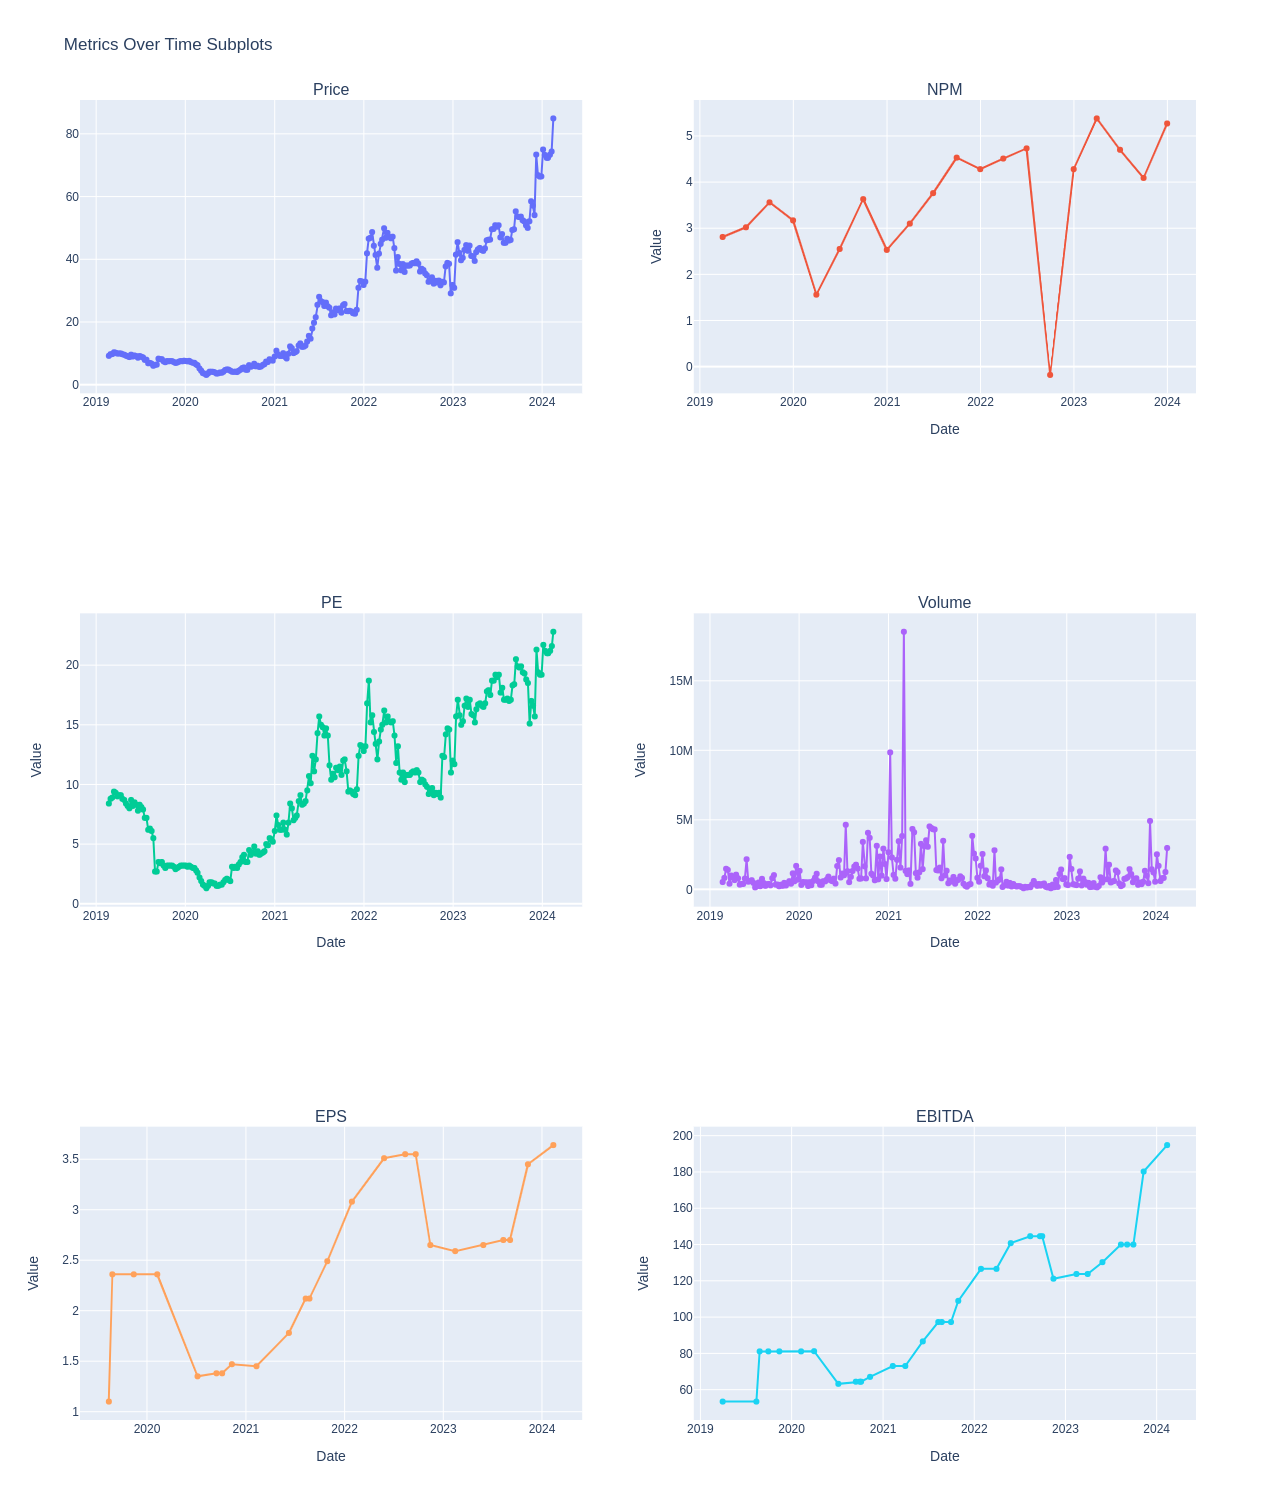

In [51]:
import json
import plotly.subplots as sp
import plotly.graph_objects as go
from datetime import datetime

# Function to extract dates and values for a specific metric from a JSON file
def extract_metric_values(metric, filename):
    with open(filename, 'r') as file:
        json_data = json.load(file)

    # Find the dataset with the specified metric
    dataset = next((dataset for dataset in json_data['datasets'] if dataset['metric'] == metric), None)

    # Extract 'values' for the specified metric
    if dataset:
        metric_values = dataset.get('values', [])
        # Convert date strings to datetime objects
        dates_values = [(datetime.strptime(val[0], "%Y-%m-%d"), float(val[1])) for val in metric_values]
        # Sort by dates
        dates_values.sort(key=lambda x: x[0])
        dates, values = zip(*dates_values)
        return dates, values
    else:
        print(f"No {metric} data found in the JSON file '{filename}' or incorrect structure.")
        return None, None

# Extract dates and values for different metrics
price_dates, price_values = extract_metric_values("Price", "output_price.json")
npm_dates, npm_values = extract_metric_values("NPM", "output_margin.json")
pe_dates, pe_values = extract_metric_values("Price to Earning", "output_pe_ratio.json")
volume_dates, volume_values = extract_metric_values("Volume", "output_price.json")
eps_dates, eps_values = extract_metric_values("EPS", "output_pe_ratio.json")
ebitda_dates, ebitda_values = extract_metric_values("EBITDA", "output_ev_ebitda.json")

# Create subplot with 3 rows and 2 columns
fig = sp.make_subplots(rows=3, cols=2, subplot_titles=['Price', 'NPM', 'PE', 'Volume', 'EPS', 'EBITDA'])

# Create traces for each metric
traces = [
    go.Scatter(x=price_dates, y=price_values, mode='lines+markers', name='Price'),
    go.Scatter(x=npm_dates, y=npm_values, mode='lines+markers', name='NPM'),
    go.Scatter(x=pe_dates, y=pe_values, mode='lines+markers', name='PE'),
    go.Scatter(x=volume_dates, y=volume_values, mode='lines+markers', name='Volume'),
    go.Scatter(x=eps_dates, y=eps_values, mode='lines+markers', name='EPS'),
    go.Scatter(x=ebitda_dates, y=ebitda_values, mode='lines+markers', name='EBITDA')
]

# Add traces to subplots
for i in range(len(traces)):
    row = (i // 2) + 1
    col = (i % 2) + 1
    fig.add_trace(traces[i], row=row, col=col)

# Update layout for each subplot
for i in range(1, 7):
    row = (i // 2) + 1
    col = (i % 2) + 1
    fig.update_xaxes(title_text='Date', row=row, col=col)
    fig.update_yaxes(title_text='Value', row=row, col=col)

# Update layout for the entire figure
fig.update_layout(height=1500, width=1500, showlegend=False, title_text='Metrics Over Time Subplots')

# Show the plot
fig.show()


## Download Valid company numbers

In [52]:
import requests
import json

# Function to fetch JSON data for a given company number
def fetch_company_data(company_number):
    url = f"https://www.screener.in/api/company/{company_number}/chart/?q=Price-DMA50-DMA200-Volume&days=1825&consolidated=true"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data for company {company_number}. Status code: {response.status_code}")
        return None

# Iterate through company numbers from 11 to 4000
valid_company_numbers = []

for company_number in range(11, 50):
    company_data = fetch_company_data(company_number)

    if company_data:
        # If JSON data is returned, store the company number
        valid_company_numbers.append(company_number)

# Store valid company numbers in a JSON file
output_file_path = "valid_company_numbers.json"
with open(output_file_path, 'w') as output_file:
    json.dump(valid_company_numbers, output_file)

print(f"Valid Company Numbers stored in {output_file_path}")


Valid Company Numbers stored in valid_company_numbers.json


## Correlation matrix of the data

Correlation between EBITDA and Net Profit Margin: 0.31
Correlation between PE and Price: 1.00
Correlation between EPS and Volume: 0.17


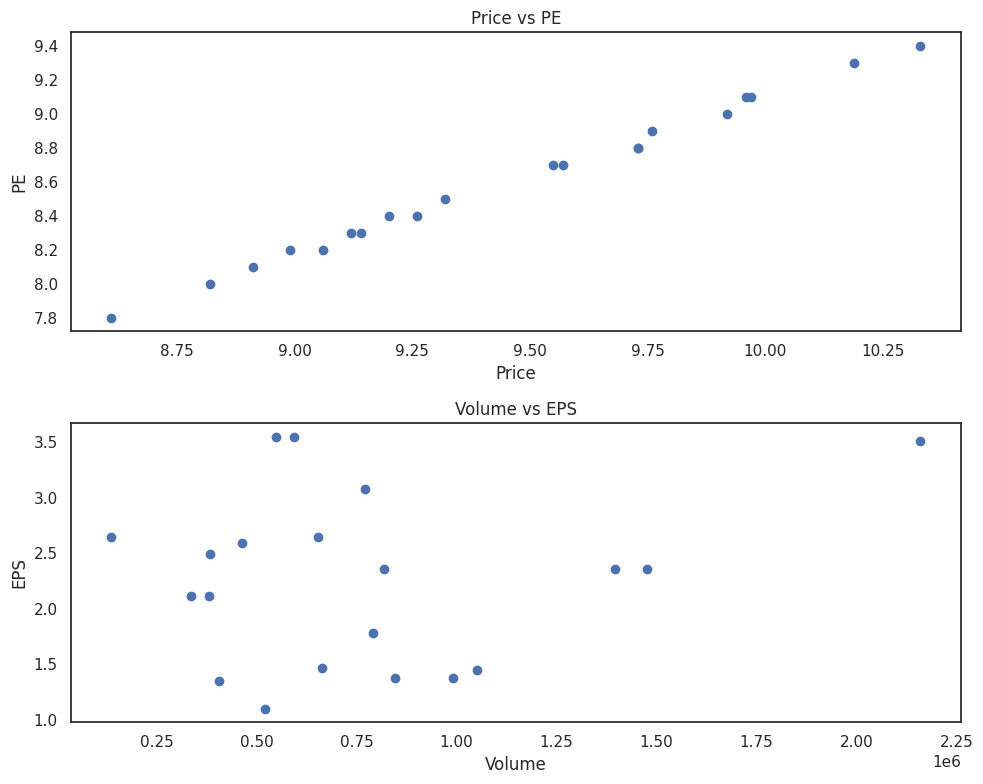

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV data into DataFrame
df = pd.read_csv('metrics_values.csv')

# Analyze if EBITDA is increasing with Net Profit Margin
ebitda_margin_corr = df['EBITDA'].corr(df['Net Profit Margin'])
print(f'Correlation between EBITDA and Net Profit Margin: {ebitda_margin_corr:.2f}')

# Analyze if PE and EPS are increasing with Price and Volume
pe_price_corr = df['PE'].corr(df['Price'])
eps_volume_corr = df['EPS'].corr(df['Volume'])

print(f'Correlation between PE and Price: {pe_price_corr:.2f}')
print(f'Correlation between EPS and Volume: {eps_volume_corr:.2f}')

# Plotting Price vs PE and Volume vs EPS
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].scatter(df['Price'], df['PE'])
axes[0].set_xlabel('Price')
axes[0].set_ylabel('PE')
axes[0].set_title('Price vs PE')

axes[1].scatter(df['Volume'], df['EPS'])
axes[1].set_xlabel('Volume')
axes[1].set_ylabel('EPS')
axes[1].set_title('Volume vs EPS')

plt.tight_layout()
plt.show()


/tmp/ipykernel_13319/3620016158.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



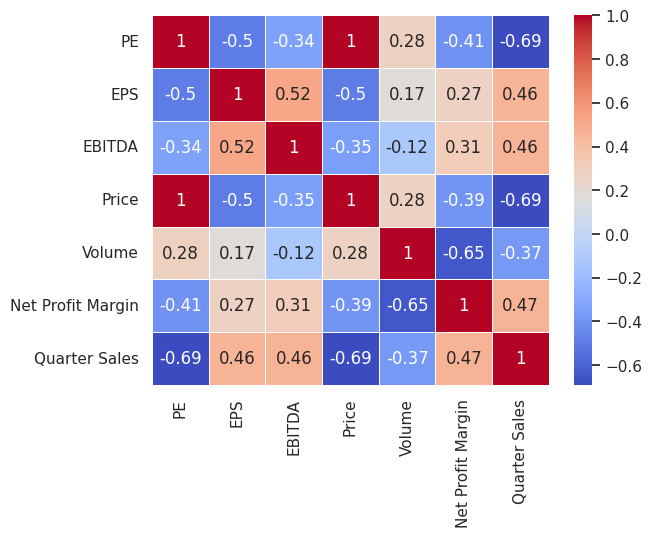

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Plotting a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


/tmp/ipykernel_13319/30370609.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



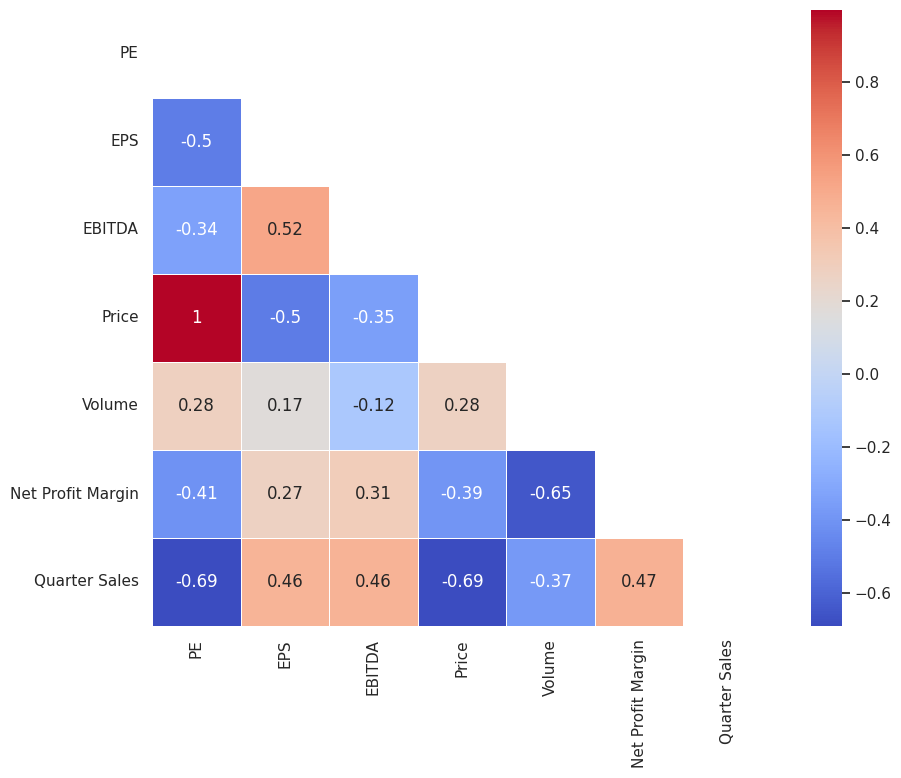

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, linewidths=.5)

plt.show()


/tmp/ipykernel_13319/3764087617.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



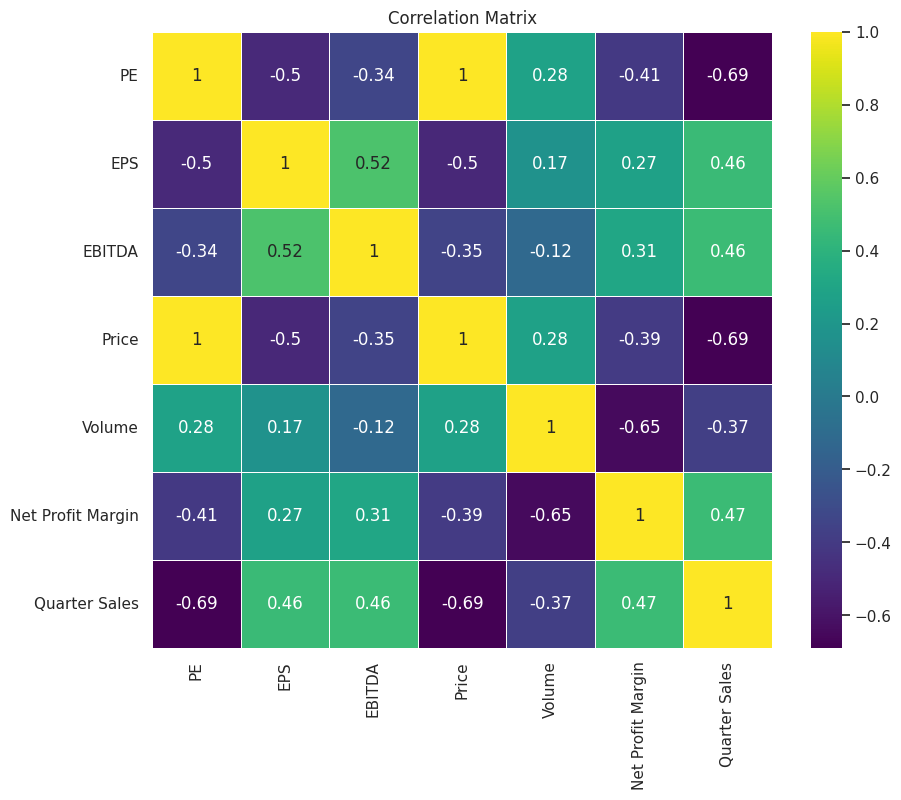

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Set up the matplotlib figure with a reasonable size
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting a heatmap of the correlation matrix with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5, ax=ax)

# Adding a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


/tmp/ipykernel_13319/1166954562.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



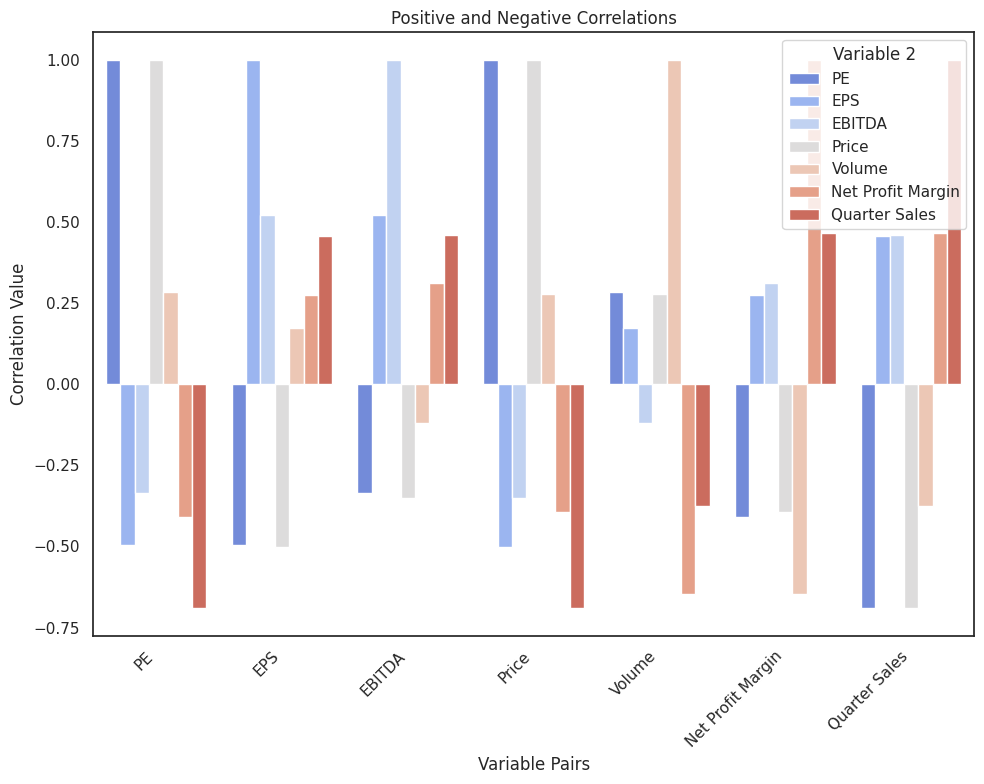

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Set up the matplotlib figure with a reasonable size
fig, ax = plt.subplots(figsize=(10, 8))

# Flatten the correlation matrix and create a DataFrame
correlation_flat = correlation_matrix.unstack().reset_index(name='correlation')

# Plotting a bar plot for positive and negative correlations
sns.barplot(x='level_0', y='correlation', hue='level_1', data=correlation_flat, palette="coolwarm")

# Adding labels and title
plt.xlabel('Variable Pairs')
plt.ylabel('Correlation Value')
plt.title('Positive and Negative Correlations')

# Show the plot
plt.xticks(rotation=45, ha="right")
plt.legend(title='Variable 2', loc='upper right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_13319/3238863454.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



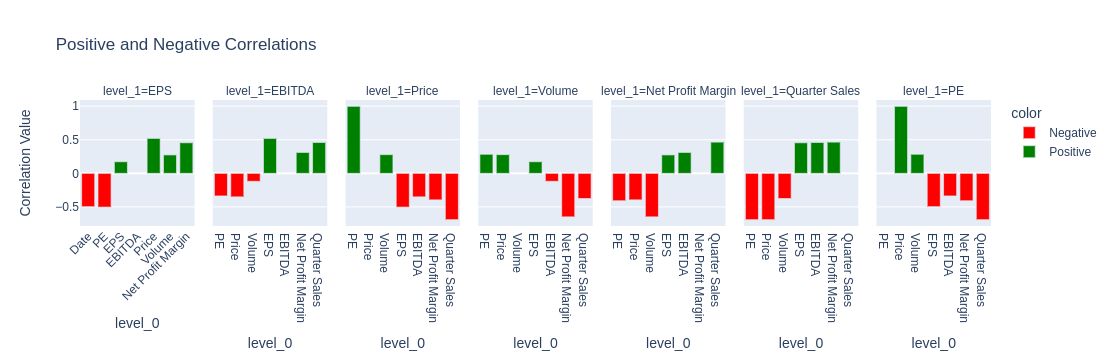

In [58]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Flatten the correlation matrix and create a DataFrame
correlation_flat = correlation_matrix.unstack().reset_index(name='correlation')

# Filter out self-correlations
correlation_flat = correlation_flat[correlation_flat['level_0'] != correlation_flat['level_1']]

# Create a color column for positive and negative correlations
correlation_flat['color'] = correlation_flat['correlation'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Plotly Express bar plot
fig = px.bar(
    correlation_flat,
    x='level_0',
    y='correlation',
    color='color',
    facet_col='level_1',
    color_discrete_map={'Positive': 'green', 'Negative': 'red'},
    labels={'correlation': 'Correlation Value'},
    title='Positive and Negative Correlations',
)

# Customize layout
fig.update_layout(
    xaxis=dict(tickangle=-45, tickmode='array', tickvals=list(range(len(df.columns))), ticktext=df.columns),
    yaxis=dict(title='Correlation Value'),
)

# Show the interactive plot
fig.show()
